In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import math
import random as rd
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as s
import scipy.stats as ss
from sklearn.utils import resample
import warnings 
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import emoji
from textblob import TextBlob

In [2]:
data=pd.read_csv(r"C:\Users\Gogula Vinay\Desktop\Innomatics labs\Data Science\Machine Learning\glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
fv = data.drop(columns='Type')
label =data['Type']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(fv,label,train_size=0.8,random_state=1)
x_train_cv,x_cv,y_train_cv,y_cv=train_test_split(x_train,y_train,train_size=0.8,random_state=1)

In [5]:
from sklearn.preprocessing import Normalizer

In [6]:
norm = Normalizer()
transfromed_train = norm.fit_transform(x_train_cv)
transfromed_cv = norm.transform(x_cv)
transfromed_test = norm.transform(x_test)

In [7]:
train_error = []
def func1(k):
    for i in range(1,k,2):
        knn = KNeighborsClassifier(n_neighbors=i)
        model = knn.fit(transfromed_train,y_train_cv)
        y_predicted = model.predict(transfromed_train)
        acu = accuracy_score(y_train_cv,y_predicted)
        train_error.append(1-acu)

In [8]:
cv_error = []
k_value = []
def func2(k):
    for i in range(1,k,2):
        knn = KNeighborsClassifier(n_neighbors=i)
        model = knn.fit(transfromed_train,y_train_cv)
        y_predicted = model.predict(transfromed_cv)
        acu = accuracy_score(y_cv,y_predicted)
        k_value.append(i)
        cv_error.append(1-acu)

In [9]:
func1(20)
func2(20)

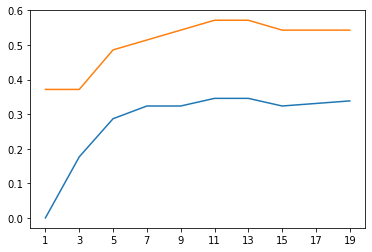

In [10]:
import matplotlib.pyplot as plt 
plt.plot(k_value,train_error)
plt.xticks(k_value)
plt.plot(k_value,cv_error)
plt.xticks(k_value)
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(transfromed_train,y_train_cv)
y_predicted = model.predict(transfromed_test)
acu = accuracy_score(y_test,y_predicted)

In [12]:
acu

0.7441860465116279